In [169]:
import pandas as pd
import hvplot.pandas
import numpy as np
import json
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import requests
import warnings
warnings.filterwarnings("ignore")

In [170]:
obesity_df = pd.read_csv('obesity_diabetes_csv.csv')
obesity_df = obesity_df.loc[obesity_df["Measure"] == "Obesity among adults aged >=18 years"]
obesity_df = obesity_df[["LocationName", "Measure", "Data_Value", "Geolocation"]]
obesity_df = obesity_df.rename(columns={"LocationName":"Zipcode", "Data_Value":"Obesity_Rate"})
obesity_df.reset_index(drop=True, inplace=True)
obesity_df[['point','Longitude', 'Latitude']] = obesity_df['Geolocation'].str.split(' ', expand=True)
obesity_df.head()

,Zipcode,Measure,Obesity_Rate,Geolocation,point,Longitude,Latitude
0,73002,Obesity among adults aged >=18 years,40.6,POINT (-97.73097606 34.94935021),POINT,(-97.73097606,34.94935021)
1,73003,Obesity among adults aged >=18 years,34.4,POINT (-97.49717346 35.66897845),POINT,(-97.49717346,35.66897845)
2,73004,Obesity among adults aged >=18 years,37.9,POINT (-97.905542 35.13636931),POINT,(-97.905542,35.13636931)
3,73005,Obesity among adults aged >=18 years,45.0,POINT (-98.23818097 35.05783297),POINT,(-98.23818097,35.05783297)
4,73006,Obesity among adults aged >=18 years,43.1,POINT (-98.40269923 34.90892372),POINT,(-98.40269923,34.90892372)


In [171]:
finance_df = pd.read_csv('finance.csv')
finance_df.head()

,Zipcode,Average Income
0,73002,3596.333333
1,73003,120412.166700
2,73004,4271.333333
3,73005,23016.500000
4,73006,11155.333330


In [172]:
obesityvsfinance_df = pd.concat([obesity_df, finance_df], axis=1, join="outer")
obesityvsfinance_df

,Zipcode,Measure,Obesity_Rate,Geolocation,point,Longitude,Latitude,Zipcode,Average Income
0,73002,Obesity among adults aged >=18 years,40.6,POINT (-97.73097606 34.94935021),POINT,(-97.73097606,34.94935021),73002,3596.333333
1,73003,Obesity among adults aged >=18 years,34.4,POINT (-97.49717346 35.66897845),POINT,(-97.49717346,35.66897845),73003,120412.166700
2,73004,Obesity among adults aged >=18 years,37.9,POINT (-97.905542 35.13636931),POINT,(-97.905542,35.13636931),73004,4271.333333
3,73005,Obesity among adults aged >=18 years,45.0,POINT (-98.23818097 35.05783297),POINT,(-98.23818097,35.05783297),73005,23016.500000
4,73006,Obesity among adults aged >=18 years,43.1,POINT (-98.40269923 34.90892372),POINT,(-98.40269923,34.90892372),73006,11155.333330
...,...,...,...,...,...,...,...,...,...
637,74962,Obesity among adults aged >=18 years,42.8,POINT (-94.95251004 35.53332988),POINT,(-94.95251004,35.53332988),NaN,NaN
638,74963,Obesity among adults aged >=18 years,45.9,POINT (-94.53001825 34.41852811),POINT,(-94.53001825,34.41852811),NaN,NaN
639,74964,Obesity among adults aged >=18 years,43.0,POINT (-94.66423382 36.11705387),POINT,(-94.66423382,36.11705387),NaN,NaN
640,74965,Obesity among adults aged >=18 years,43.1,POINT (-94.58289225 35.97503202),POINT,(-94.58289225,35.97503202),NaN,NaN


In [173]:
obesity_df = obesityvsfinance_df.dropna(subset=['Average Income', 'Obesity_Rate'])
average_income_cleaned = obesityvsfinance_df_cleaned['Average Income']
obesity_rate_cleaned = obesityvsfinance_df_cleaned['Obesity_Rate']
obesityvsfinance_df_cleaned

,Zipcode,Measure,Obesity_Rate,Geolocation,point,Longitude,Latitude,Zipcode,Average Income
0,73002,Obesity among adults aged >=18 years,40.6,POINT (-97.73097606 34.94935021),POINT,(-97.73097606,34.94935021),73002,3596.333333
1,73003,Obesity among adults aged >=18 years,34.4,POINT (-97.49717346 35.66897845),POINT,(-97.49717346,35.66897845),73003,120412.166700
2,73004,Obesity among adults aged >=18 years,37.9,POINT (-97.905542 35.13636931),POINT,(-97.905542,35.13636931),73004,4271.333333
3,73005,Obesity among adults aged >=18 years,45.0,POINT (-98.23818097 35.05783297),POINT,(-98.23818097,35.05783297),73005,23016.500000
4,73006,Obesity among adults aged >=18 years,43.1,POINT (-98.40269923 34.90892372),POINT,(-98.40269923,34.90892372),73006,11155.333330
...,...,...,...,...,...,...,...,...,...
542,74730,Obesity among adults aged >=18 years,42.8,POINT (-96.43334926 33.90486208),POINT,(-96.43334926,33.90486208),74964,6299.333333
543,74731,Obesity among adults aged >=18 years,42.8,POINT (-96.5603647 33.87800101),POINT,(-96.5603647,33.87800101),74965,13275.000000
544,74733,Obesity among adults aged >=18 years,42.7,POINT (-96.48260674 33.83108132),POINT,(-96.48260674,33.83108132),74966,11991.500000
545,74734,Obesity among adults aged >=18 years,45.2,POINT (-94.54620609 34.10225284),POINT,(-94.54620609,34.10225284),99999,455879.000000


In [174]:
obesityvsfinance_df_cleaned['Obesity_Rate'].count()

547

In [175]:
print("Missing values in 'Average Income':", average_income.isnull().sum())
print("Missing values in 'Obesity_Rate':", obesity_rate.isnull().sum())

Missing values in 'Average Income': 0
Missing values in 'Obesity_Rate': 0


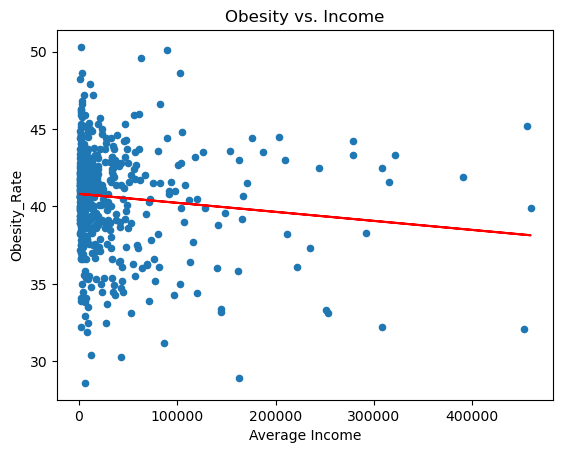

NameError: name 'rvalue' is not defined

In [201]:
obesityvsfinance_df_cleaned.plot.scatter(x='Average Income', y='Obesity_Rate')
plt.title('Obesity vs. Income')
def reg_plot():
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x_values,regress_values,"r-")
    plt.show()
reg_plot()
print(f"The r-squared is: {rvalue**2}")

In [177]:
summary_statistics = obesityvsfinance_df_cleaned[['Average Income', 'Obesity_Rate']].describe()
print(summary_statistics)

       Average Income  Obesity_Rate
count      547.000000    547.000000
mean     32785.412699     40.621024
std      62770.088106      3.221905
min        675.666667     28.600000
25%       2927.416667     39.000000
50%       8245.166667     41.000000
75%      32996.916665     42.800000
max     459684.666700     50.300000


In [178]:
critical_value = st.chi2.ppf(q = 0.95, df = 1)
critical_value

3.841458820694124

Text(0.5, 0, 'Avergage Income')

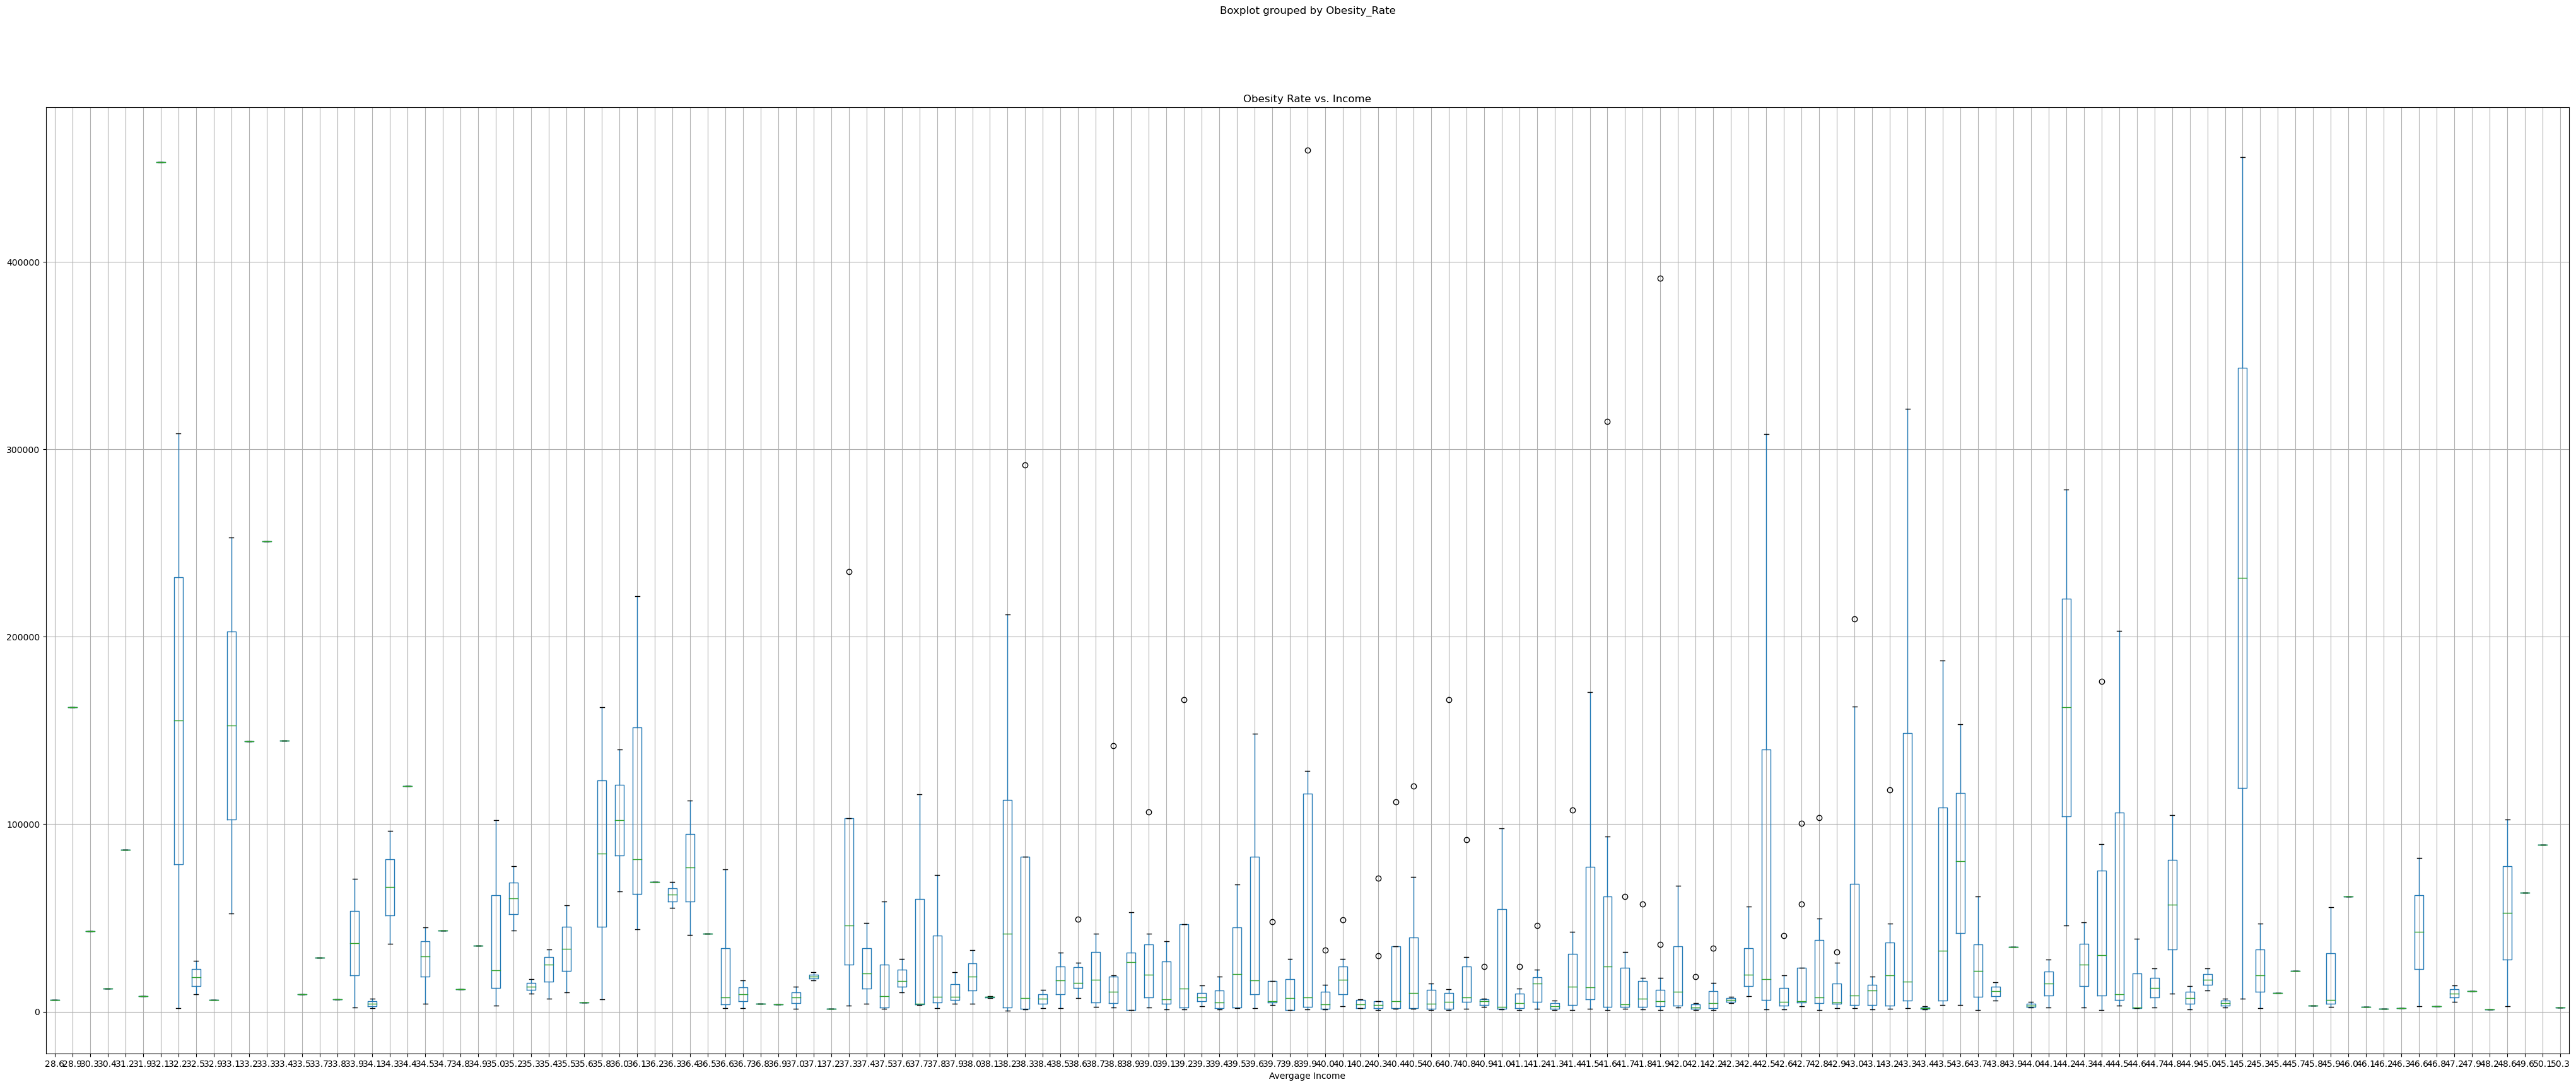

In [157]:
obesityvsfinance_df_cleaned.boxplot("Average Income", by="Obesity_Rate", figsize = (50,20))
plt.title('Obesity Rate vs. Income')
plt.xlabel('Avergage Income')